In [1]:
import pandas as pd
import numpy as np
# import data
cars = pd.read_csv('cars.csv')
cars = cars[['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate']]
# check variable types
print(cars.dtypes)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object


## Ordinal encoding
We mentioned already that ordinal data is data that does have order and a hierarchy between its values. Let us take a look at the condition feature from our data frame and perform a value_counts to see how many times each label is listed in our feature.

In [2]:
np.arange(1,2,0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [3]:
map_dict = {round(i,1):'Fair' for i in np.arange(0,2,0.1)}
map_dict.update({round(j,1):'Good' for j in np.arange(2,2.6,0.1)})
map_dict.update({round(j,1):'Like New' for j in np.arange(2.6,3,0.1)})
map_dict.update({round(j,1):'New' for j in np.arange(3,3.7,0.1)})
map_dict.update({round(j,1):'Excellent' for j in np.arange(3.7,8,0.1)})
map_dict.update({np.nan:'New'})

In [4]:
cars['condition'] = cars['condition'].map(map_dict)
print(cars['condition'].value_counts())

condition
Excellent    4531
New          2186
Like New     1223
Good         1180
Fair          880
Name: count, dtype: int64


In [5]:
# create dictionary of label:values in order
rating_dict = {'Excellent':5, 'New':4, 'Like New':3, 'Good':2, 'Fair':1}

#create a new column 
cars['condition_rating'] = cars['condition'].map(rating_dict)

print(cars['condition_rating'].value_counts())

condition_rating
5    4531
4    2186
3    1223
2    1180
1     880
Name: count, dtype: int64


In [6]:
# using scikit-learn
from sklearn.preprocessing import OrdinalEncoder

# create encoder and set category order
encoder = OrdinalEncoder(categories=[['Excellent', 'New', 'Like New', 'Good', 'Fair']])

# reshape our feature
condition_reshaped = cars['condition'].values.reshape(-1,1)

# create new variable with assigned numbers
cars['condition_rating'] = encoder.fit_transform(condition_reshaped)

print(cars['condition_rating'].value_counts())

condition_rating
0.0    4531
1.0    2186
2.0    1223
3.0    1180
4.0     880
Name: count, dtype: int64


## Label Encoding
Now, we can talk about nominal data, and we have to approach this type of data differently than what we did with ordinal data. Our color feature has a lot of different labels, but here are the top five colors that appear in our data frame.

In [7]:
print(cars['color'].nunique())
# #OUTPUT 
# 19
cars = cars.dropna()
print(cars['color'].value_counts())

19
color
black        1723
white        1626
silver       1315
gray         1311
blue          750
red           696
—             391
gold          172
green         161
beige         142
burgundy      128
brown         102
orange         37
yellow         20
purple         19
off-white      19
charcoal        6
turquoise       4
pink            2
Name: count, dtype: int64


In [8]:
# convert feature to category type
cars['color'] = cars['color'].astype('category')

# save new version of category codes
cars['color'] = cars['color'].cat.codes

# print to see transformation
print(cars['color'].value_counts()[:5])

color
1     1723
16    1626
14    1315
7     1311
2      750
Name: count, dtype: int64


In [9]:
import pandas as pd
import numpy as np
# import data
cars = pd.read_csv('cars.csv')
cars = cars[['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate']]
cars = cars.dropna()

In [10]:
from sklearn.preprocessing import LabelEncoder

# create encoder
encoder = LabelEncoder()

# create new variable with assigned numbers
cars['color'] = encoder.fit_transform(cars['color'])

## One-hot Encoding
One-hot encoding is when we create a dummy variable for each value of our categorical feature, and a dummy variable is defined as a numeric variable with two values: 1 and 0. We will continue to talk about our color feature from our used car dataset.

Looking at this visual below, we can see we have ten cars in four different colors. In place of the single color column, we create four dummy variables - one new column for each color. Then the values that go into that column are binary, indicating if the car in that row is the color of the column name (1) or not (0).

In [11]:
cars = pd.read_csv('cars.csv')
cars = cars[['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate']]
cars = cars.dropna()

In [12]:
import pandas as pd
# use pandas .get_dummies method to create one new column for each color
ohe = pd.get_dummies(cars['color'])

# join the new columns back onto our cars dataframe
cars = cars.join(ohe)

## Binary encoding
If we find the need to one-hot encode a lot of categorical features which would, in turn, create a sparse matrix and may cause problems for our model, a strong alternative to this issue is performing a binary encoder. A binary encoder will find the number of unique categories and then convert each category to its binary representation. Let us take a quick review of binary numbers and keep using our color feature. We know that we have 19 unique colors, so the way to represent the numbers from 1 to 19 in binary format is as follows:

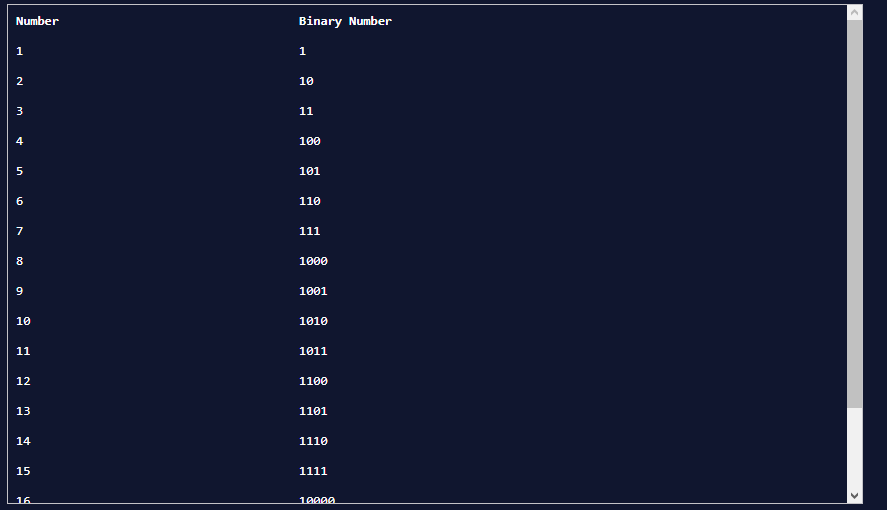

In [13]:
cars = pd.read_csv('cars.csv')
cars = cars[['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate']]
cars = cars.dropna()

In [14]:
from category_encoders import BinaryEncoder

#this will create a new data frame with the color column removed and replaced with our 5 new binary feature columns
colors = BinaryEncoder(cols = ['color'], drop_invariant = True).fit_transform(cars)


In [15]:
colors.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color_0,color_1,color_2,color_3,color_4,interior,seller,mmr,sellingprice,saledate
0,2006,Chrysler,300,Base,Sedan,automatic,2c3ka43r76h366165,il,1.9,119618.0,0,0,0,0,1,gray,go financial,4775,2500,Thu May 28 2015 03:00:00 GMT-0700 (PDT)
1,2014,Volkswagen,Jetta,S,Sedan,manual,3vw1k7aj9em275429,ca,4.9,7740.0,0,0,0,1,0,black,volkswagen credit inc/sc,12050,12750,Wed Jul 01 2015 09:30:00 GMT-0700 (PDT)
2,2007,Dodge,Durango,SLT,SUV,automatic,1d8hd48p97f510727,fl,1.9,166628.0,0,0,0,1,1,tan,mid atlantic finance/clearwater,2850,2700,Wed Feb 11 2015 08:00:00 GMT-0800 (PST)
3,2013,Mercedes-Benz,E-Class,E350 Sport,Sedan,automatic,wddhf5kb3da735753,tx,3.8,23923.0,0,0,1,0,0,off-white,mercedes-benz financial services,32200,32000,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
4,2013,Ford,Explorer,XLT,SUV,automatic,1fm5k8d84dgc59887,mi,5.0,18494.0,0,0,1,0,1,black,"ford motor credit company,llc",29100,28100,Thu Jun 11 2015 02:30:00 GMT-0700 (PDT)


## Hashing
Another option we have available to us is an encoding technique called hashing. This process is similar to one-hot encoding where it will create new binary columns, but within the parameters, you can decide how many features to output. A huge advantage is reduced dimensionality, but a large disadvantage is that some categories will be mapped to the same values. That is called collision.

For example, we have 19 different colored cars. If I were to use the hash encoder and set the number of features to be 4, I will definitely have a few colors with the same hash values.

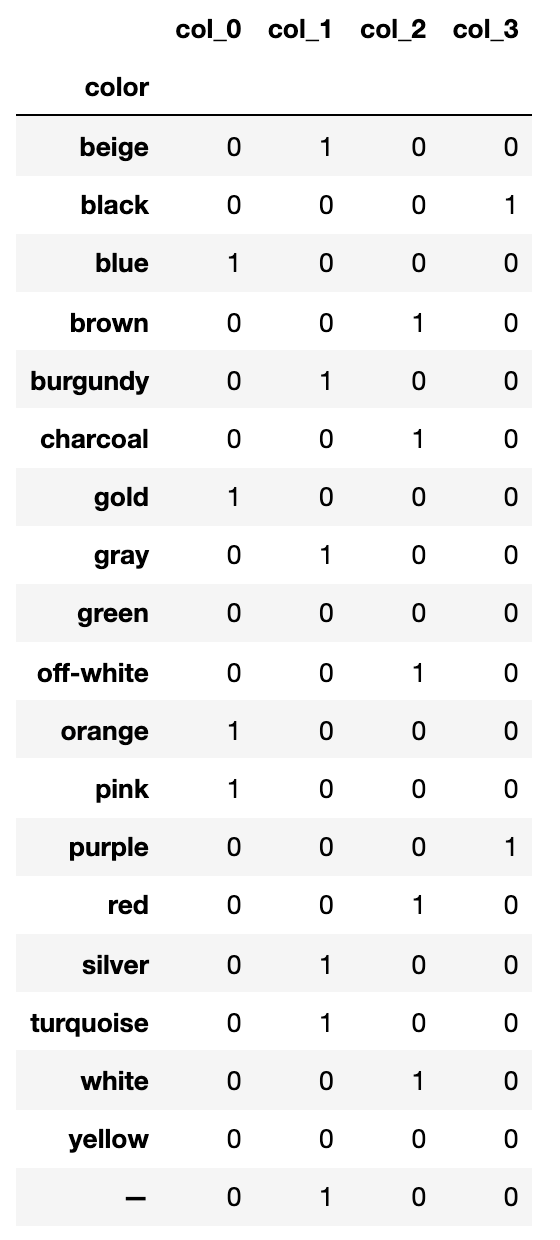

In [16]:
from category_encoders import HashingEncoder

# instantiate our encoder
encoder = HashingEncoder(cols='color', n_components=5)

# do a fit transform on our color column and set to a new variable
hash_results = encoder.fit_transform(cars['color'])

Now you may be thinking, when would I use this if I’m going to lose information and my model will see brown and charcoal (or some other color combo with the same hash value) as the same thing? Well, this could be a solution to your project and dataset if you are not as interested in assessing the impact of any particular categorical value.

For this example, maybe you aren’t interested in knowing which color car had an impact on your final prediction, but you want to be able to get the best performance from your model. This encoding solution may be a good approach.

## Target encoding
Target encoding is a Bayesian encoder used to transform categorical features into hashed numerical values and is sometimes called the mean encoder. This encoder can be utilized for data sets that are being prepared for regression-based supervised learning, as it needs to take into consideration the mean of the target variable and its correlation between each individual category of our feature. In fact, the numerical values of each category is replaced with a blend of the posterior probability of the target given a particular categorical value and the prior probability of the target over all the training data.

Woah, now that was a lot of Bayesian buzzwords. How would it work with our specific color feature? It replaces each color with a blend of the mean price of that car color and the mean price of all the cars. Had it been predicting something categorical, it would’ve used a Bayesian target statistic.

Some drawbacks to this approach are overfitting and unevenly distributed values that could lead to extremes. Let’s review how to implement this in Python and check out what type of numerical values it will return. Again, we’ll continue with our color feature - hope you are not yet tired of it!

Say we are preparing our dataset for a regression-based supervised learning algorithm that is trying to predict the selling price.

https://youtu.be/589nCGeWG1w

In [17]:
from category_encoders import TargetEncoder

# instantiate our encoder
encoder = TargetEncoder(cols = 'color')

# set the results of our fit_transform to a variable 
# the output will be its own pandas series
encoder_results = encoder.fit_transform(cars['color'], cars['sellingprice'])

print(encoder_results.head())

          color
0  12062.071331
1  18295.372751
2   8531.710251
3  14911.750939
4  13103.952733


In [18]:
print(np.sort(encoder_results['color'].unique()))

[ 8437.82715912  8531.71025112  9840.34278853 11288.99694823
 11731.65683379 11896.9203125  11933.14557506 12015.73759155
 12062.07133059 13044.41720349 13103.95273264 13226.41732698
 13476.42828094 13938.76124031 14469.04863109 14911.75093867
 15457.8083974  17591.8119079  18295.37275064]


In [37]:
cars = pd.read_csv('cars.csv')
cars = cars[['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate']]
cars = cars.dropna()

In [38]:
import re
print(cars['saledate'].dtypes)
# # OUTPUT
# dtype('O')
cars['saledate'] = cars['saledate'].apply(lambda date: re.findall(r'\w{3} \d{2} \d{4}',date)[0])

cars['saledate'] = pd.to_datetime(cars['saledate'],format='mixed')
print(cars['saledate'].dtypes)

object


datetime64[ns]


In [39]:
# create new variable for month
cars['month'] = cars['saledate'].dt.month

# create new variable for day of the week
cars['dayofweek'] = cars['saledate'].dt.day

# create new variable for difference between cars model year and year sold
cars['yearbuild_sold'] = cars['saledate'].dt.year - cars['year']

Below are other options available through pandas .dt

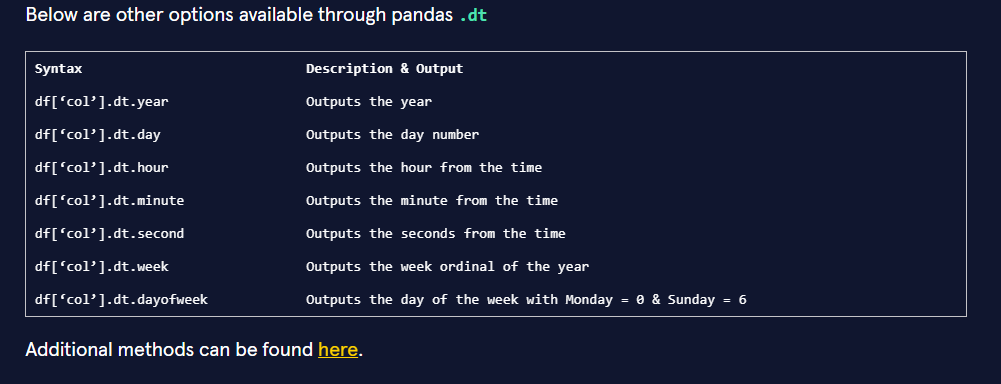

Additional methods can be found here. https://pandas.pydata.org/pandas-docs/version/0.23/api.html#datetimelike-properties